In [137]:
# importo librerias
import pandas as pd
import numpy as np

In [138]:
# ingesto data cruda
raw_data=pd.read_csv('ML_cars.csv')
raw_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [139]:
# hago transformaciones a algunos datos
raw_data.cylindernumber.replace('four',4,inplace=True)
raw_data.cylindernumber.replace('six',6,inplace=True)
raw_data.cylindernumber.replace('five',5,inplace=True)
raw_data.cylindernumber.replace('three',3,inplace=True)
raw_data.cylindernumber.replace('twelve',12,inplace=True)
raw_data.cylindernumber.replace('two',2,inplace=True)
raw_data.cylindernumber.replace('eight',8,inplace=True)
raw_data.doornumber.replace('two',2,inplace=True)
raw_data.doornumber.replace('four',4,inplace=True)

# dropeo precio y la meto en una variable nueva. dropeo CarName ya que no me parece relevante para el analisis
price = raw_data.price
raw_data.drop(columns='price',inplace=True)
raw_data.drop(columns='CarName',inplace=True)


array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'doornumber'}>,
        <Axes: title={'center': 'wheelbase'}>],
       [<Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>],
       [<Axes: title={'center': 'cylindernumber'}>,
        <Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>],
       [<Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>],
       [<Axes: title={'center': 'highwaympg'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

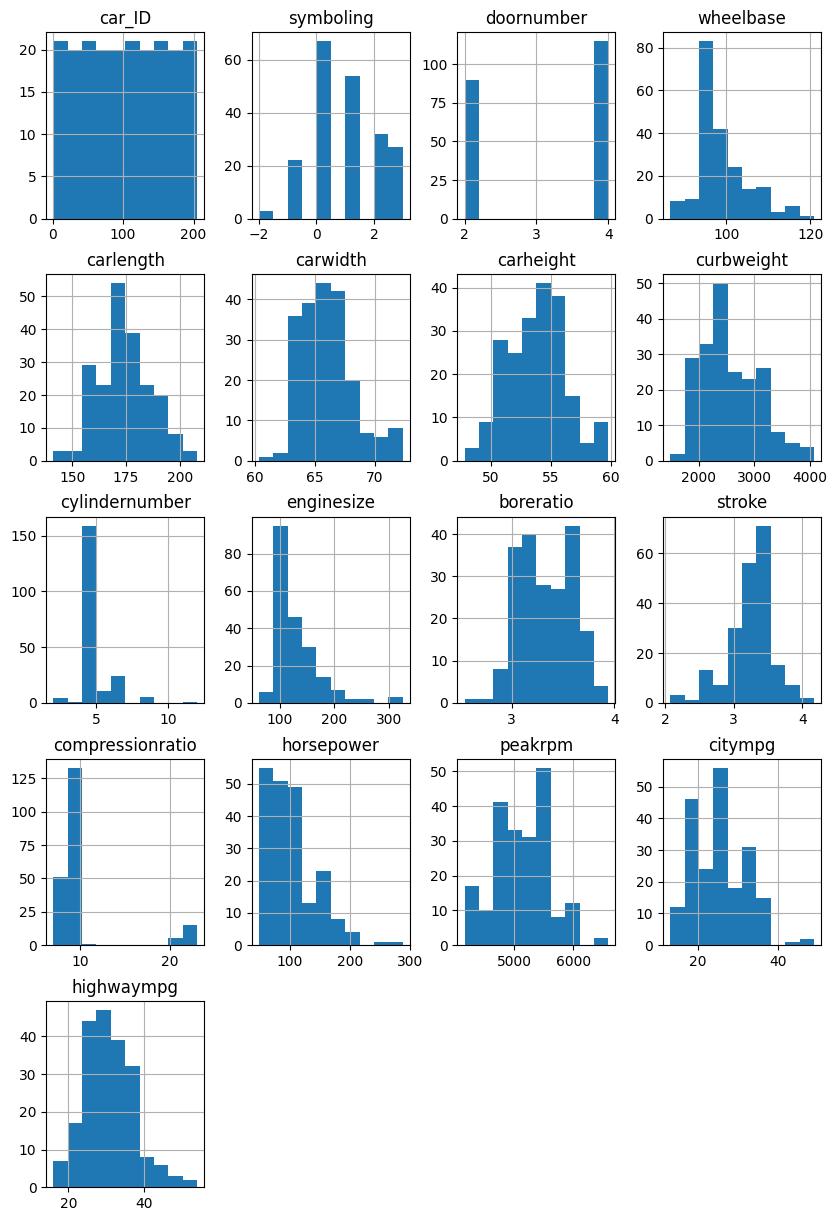

In [140]:
raw_data.hist(figsize=(10,15))

In [141]:
# estas listas se usan para asignar un escalador a cada columna

features_robust = ["cylindernumber", "enginesize", "stroke", "compressionratio", "horsepower"] #--> outliers
features_standard = ["symboling", "wheelbase", "carlength", "carwidth", "carheight","curbweight", "boreratio", "highwaympg","doornumber"]#--> distribuciones normales
features_minmax = ["peakrpm", "citympg"]#--> rangos definidos

In [142]:
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

robust = RobustScaler()
standard = StandardScaler()
minmax = MinMaxScaler()


# itero la data y la inserto en un dataframe, a la vez que les aplico scaling(numericas) o one-hot-encoding(categoricas)
df=pd.DataFrame(raw_data.car_ID)

for i in raw_data:

    if i in features_robust:
        scaled=robust.fit_transform(np.reshape(raw_data[i],(-1,1)))
        raveled=scaled.ravel()
        serie=pd.Series(data=raveled,name=i)
        df[i]=serie
        
    elif i in features_standard:
        scaled=standard.fit_transform(np.reshape(raw_data[i],(-1,1)))
        raveled=scaled.ravel()
        serie=pd.Series(data=raveled,name=i)
        df[i]=serie
    elif i in features_minmax:
        scaled=minmax.fit_transform(np.reshape(raw_data[i],(-1,1)))
        raveled=scaled.ravel()
        serie=pd.Series(data=raveled,name=i)
        df[i]=serie

    elif raw_data[i].dtype=='O':
        scaled = pd.get_dummies(raw_data[i],dtype=int,prefix=i)
        for z in scaled:
            df[z]=scaled[z]


# añado la columna precio
df['price']=price



In [143]:
# algunos precios afectan la mediana de la variable --> quitar outliers regla 3 sigmas
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

outliers_price=detect_outliers(df.price)

print(outliers_price)
df.drop(df[df['price']>=min(outliers_price)].index,inplace=True)

[41315.0, 40960.0, 45400.0]


<Axes: >

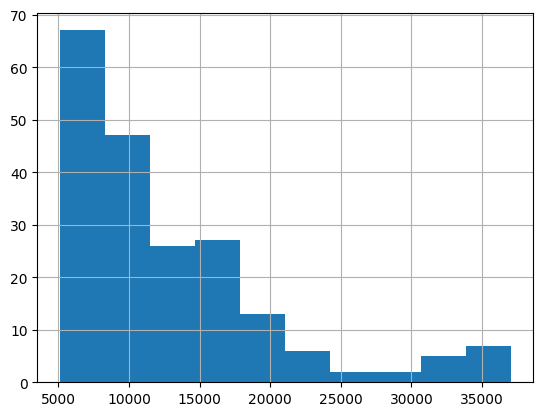

In [144]:
df.price.hist()

<Axes: >

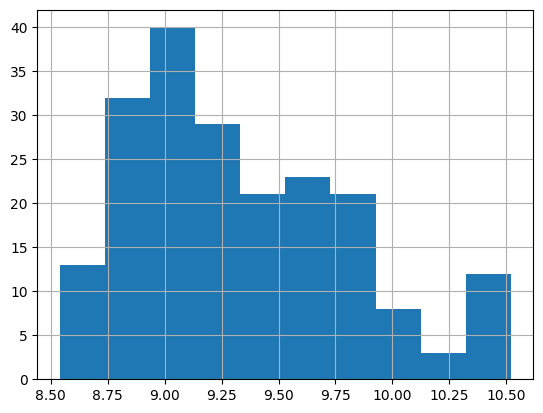

In [145]:
# ya que la variable price está muy sesgada a la derecha, vamos a aplicarle logaritmo para suavizar el sesgo
df.price = np.log(df.price)
df.price.hist() # ahora si parece mas una distribucion normal

In [146]:
# quito curbweight, ya que asumo que el peso del auto es directamente proporcional a su tamaño
df.drop(columns='curbweight', inplace=True)

# quito car_ID ya que no nos interesa
df.drop(columns='car_ID')

,symboling,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,fuelsystem_spdi,fuelsystem_spfi,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.743470,0,1,1,0,-1.130388,1,0,0,0,...,0,0,0.519071,-2.033333,0.000,0.347826,0.346939,0.222222,-0.546059,9.510075
1,1.743470,0,1,1,0,-1.130388,1,0,0,0,...,0,0,0.519071,-2.033333,0.000,0.347826,0.346939,0.222222,-0.546059,9.711116
2,0.133509,0,1,1,0,-1.130388,0,0,1,0,...,0,0,-2.404880,0.600000,0.000,1.282609,0.346939,0.166667,-0.691627,9.711116
3,0.938490,0,1,1,0,0.884652,0,0,0,1,...,0,0,-0.517266,0.366667,1.250,0.152174,0.551020,0.305556,-0.109354,9.543235
4,0.938490,0,1,1,0,0.884652,0,0,0,1,...,0,0,-0.517266,0.366667,-1.250,0.434783,0.551020,0.138889,-1.273900,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0,1,1,0,0.884652,0,0,0,1,...,0,0,1.666445,-0.466667,0.625,0.413043,0.510204,0.277778,-0.400490,9.731809
201,-1.476452,0,1,0,1,0.884652,0,0,0,1,...,0,0,1.666445,-0.466667,-0.375,1.413043,0.469388,0.166667,-0.837195,9.854560
202,-1.476452,0,1,1,0,0.884652,0,0,0,1,...,0,0,0.926204,-1.400000,-0.250,0.847826,0.551020,0.138889,-1.128332,9.975110
203,-1.476452,1,0,0,1,0.884652,0,0,0,1,...,0,0,-1.183483,0.366667,17.500,0.239130,0.265306,0.361111,-0.546059,10.019936


In [147]:
df.corr()

,car_ID,symboling,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber,carbody_convertible,carbody_hardtop,carbody_hatchback,...,fuelsystem_spdi,fuelsystem_spfi,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.159121,0.122513,-0.122513,-0.062616,0.062616,0.184442,-0.026705,0.094148,-0.121277,...,-0.039846,-0.067525,0.282989,-0.157439,0.145045,0.009193,-0.209260,-0.002500,-0.008473,-0.014594
symboling,-0.159121,1.000000,-0.196883,0.196883,0.062921,-0.062921,-0.671192,0.279094,0.175778,0.433989,...,0.181127,0.065439,-0.124347,-0.006523,-0.182562,0.085621,0.275175,-0.046117,0.025382,-0.077870
fueltype_diesel,0.122513,-0.196883,1.000000,-1.000000,-0.400081,0.400081,0.190968,-0.058000,0.027815,-0.206571,...,-0.071585,-0.023382,0.063050,0.243931,0.984645,-0.159082,-0.485130,0.253272,0.187576,0.153274
fueltype_gas,-0.122513,0.196883,-1.000000,1.000000,0.400081,-0.400081,-0.190968,0.058000,-0.027815,0.206571,...,0.071585,0.023382,-0.063050,-0.243931,-0.984645,0.159082,0.485130,-0.253272,-0.187576,-0.153274
aspiration_std,-0.062616,0.062921,-0.400081,0.400081,1.000000,-1.000000,-0.028878,0.082853,0.019745,-0.004793,...,-0.393989,0.033401,-0.227662,-0.225962,-0.292887,-0.264133,0.190228,0.218297,0.275278,-0.290875
aspiration_turbo,0.062616,-0.062921,0.400081,-0.400081,-1.000000,1.000000,0.028878,-0.082853,-0.019745,0.004793,...,0.393989,-0.033401,0.227662,0.225962,0.292887,0.264133,-0.190228,-0.218297,-0.275278,0.290875
doornumber,0.184442,-0.671192,0.190968,-0.190968,-0.028878,0.028878,1.000000,-0.199140,-0.215647,-0.619037,...,-0.149004,-0.080281,0.130828,-0.008389,0.176027,-0.117958,-0.250497,-0.023070,-0.047794,0.111596
carbody_convertible,-0.026705,0.279094,-0.058000,0.058000,0.082853,-0.082853,-0.199140,1.000000,-0.033150,-0.127412,...,-0.037782,-0.012341,0.109976,-0.116961,-0.054515,0.130441,0.010458,-0.132386,-0.128400,0.202238
carbody_hardtop,0.094148,0.175778,0.027815,-0.027815,0.019745,-0.019745,-0.215647,-0.033150,1.000000,-0.137973,...,-0.040914,-0.013364,0.182721,0.038969,0.044711,0.163966,-0.009100,-0.078260,-0.058635,0.128507
carbody_hatchback,-0.121277,0.433989,-0.206571,0.206571,-0.004793,0.004793,-0.619037,-0.127412,-0.137973,1.000000,...,0.195695,0.096859,-0.215490,0.056274,-0.209696,-0.033437,0.154523,0.105998,0.133138,-0.273841


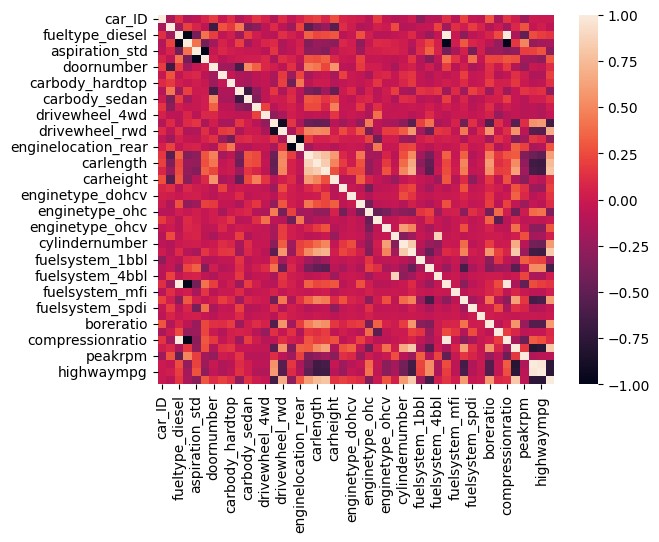

In [148]:
# grafico como heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr())
plt.show()

In [149]:
corr=df.corr()
price_corr=corr['price']
price_corr=pd.DataFrame(price_corr)
price_corr

,price
car_ID,-0.014594
symboling,-0.077870
fueltype_diesel,0.153274
fueltype_gas,-0.153274
aspiration_std,-0.290875
aspiration_turbo,0.290875
doornumber,0.111596
carbody_convertible,0.202238
carbody_hardtop,0.128507
carbody_hatchback,-0.273841


In [150]:
price_corr_l=price_corr.loc[price_corr.price.between(-0.7,-0.1,inclusive='both')]
price_corr=price_corr.loc[(price_corr.price>0.5)]
price_corr=pd.concat([price_corr,price_corr_l])
price_corr

,price
drivewheel_rwd,0.676707
wheelbase,0.602244
carlength,0.749956
carwidth,0.790068
cylindernumber,0.591624
enginesize,0.821071
fuelsystem_mpfi,0.599375
boreratio,0.592421
horsepower,0.813713
price,1.000000


In [151]:
df=df[price_corr.index.values]
df.head()

,drivewheel_rwd,wheelbase,carlength,carwidth,cylindernumber,enginesize,fuelsystem_mpfi,boreratio,horsepower,price,fueltype_gas,aspiration_std,carbody_hatchback,drivewheel_fwd,enginelocation_front,enginetype_ohc,fuelsystem_1bbl,fuelsystem_2bbl
0,1,-1.690772,-0.426521,-0.844782,0.0,0.227273,1,0.519071,0.347826,9.510075,1,1,0,0,1,0,0,0
1,1,-1.690772,-0.426521,-0.844782,0.0,0.227273,1,0.519071,0.347826,9.711116,1,1,0,0,1,0,0,0
2,1,-0.708596,-0.231513,-0.190566,2.0,0.727273,1,-2.404880,1.282609,9.711116,1,1,1,0,1,0,0,0
3,0,0.173698,0.207256,0.136542,0.0,-0.250000,1,-0.517266,0.152174,9.543235,1,1,0,1,1,1,0,0
4,0,0.107110,0.207256,0.230001,1.0,0.363636,1,-0.517266,0.434783,9.767095,1,1,0,0,1,1,0,0


In [152]:
df.drop(columns=['carlength','carwidth'],inplace=True)

In [153]:
def clasificador(price):
    if price<=df['price'].median():
        return 'cheap'
    else:
        return 'expensive'

df['classification'] = df.price.apply(clasificador)

In [154]:
df.to_csv('cars_modelado.csv',index=False)
print(len(df),'filas ingestadas')

202 filas ingestadas


In [155]:
# esta funcion debería devolver si el auto es "cheap" o "expensive" segun la mediana del precio: qué necesidad de usar sklearn en este caso??
# se puede obtener el mismo resultado con una funcion muy simple

def clasificador(price):
    if price<=df['price'].median():
        return 'cheap'
    else:
        return 'expensive'

df['classification'] = df.price.apply(clasificador)